# SFA
Evaluate the impact of each of the features in explaning the metric! 

Return both G and R from now on! The main idea is to investigate how to increase the exaplainability of each of these factors. 
- The cont factors may expalin better with the transformations! 
- While the cat ones may do it via some sort of engineering 

## score analysis

In [1]:
import glob
import json 
import torch 
import numpy as np
import pandas as pd 

from pd.params import *


In [3]:
data_dir = OUTDIR + "pd_lgbm_feat_trans__ght1pi1/"
files = glob.glob(data_dir+"oof_lgbm_baseline_2fold_seed42_*.csv")
#data = pd.read_csv(data_dir+"oof_lgbm_baseline_2fold_seed42.csv")
scores =  pd.read_csv(data_dir+"scores.csv")

In [5]:
data_dir = OUTDIR + "pd13_conv_o683udof/"
with open(data_dir+"scores.json") as f:
    scores_conv = json.load(f)

In [6]:
data_dir = OUTDIR + "pd13_lgbm_4699ukra/"

with open(data_dir+"scores.json") as f:
    scores_lgbm = json.load(f)

In [20]:
scores_lgbm["R_2"]

0.40209774467337667

In [22]:
scores = scores.merge(pd.DataFrame(scores_conv.items(), columns=["feature", "conv13"]), on="feature", how="inner")
scores = scores.merge(pd.DataFrame(scores_lgbm.items(), columns=["feature", "lgbm13"]), on="feature", how="inner")

<AxesSubplot:ylabel='Frequency'>

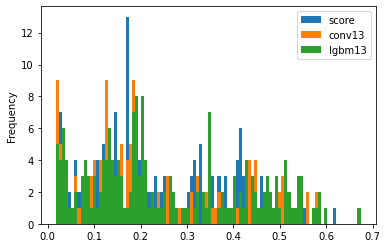

In [25]:
scores.set_index("feature").plot(kind="hist", bins=100)

In [29]:
pd.set_option('display.max_rows', 200)

scores.set_index("feature").sort_values(by="conv13", ascending=False)

,score,conv13,lgbm13
feature,,,
P_2,0.617505,0.673820,0.672050
D_48,0.529506,0.580842,0.588383
R_1,0.553033,0.575500,0.576886
D_44,0.520132,0.570245,0.570288
B_2,0.513858,0.559104,0.596138
B_9,0.519722,0.556207,0.585495
D_55,0.458940,0.547624,0.547035
B_3,0.461596,0.538002,0.544986
D_61,0.493418,0.532536,0.544714
